# School Classification Models

In [130]:
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [168]:
def get_acc_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, accuracy_score(y_test, y_pred)

In [173]:
def print_scores(name, model):
    print(name)
    #model.fit(X_train, y_train)
    y_pred_in_sample = model.predict(X_train)
    print('in sample:', metrics.accuracy_score(y_train, y_pred_in_sample))
    y_pred_out_sample = model.predict(X_test)
    print('out of sample:', metrics.accuracy_score(y_test, y_pred_out_sample))
    print(metrics.classification_report(y_test, y_pred_out_sample))
    

def get_scores(name, model):
    #model.fit(X_train, y_train)
    y_pred_in_sample = model.predict(X_train)
    acc_in_sample = metrics.accuracy_score(y_train, y_pred_in_sample)
    y_pred_out_sample = model.predict(X_test)
    acc_out_sample = metrics.accuracy_score(y_test, y_pred_out_sample)
    return name, acc_in_sample, acc_out_sample

In [174]:
def grid_search(model, params):
    model_grid = GridSearchCV(model,
                              params,
                              n_jobs=-1,
                              scoring = 'f1',
                              cv=10)
    model_grid.fit(X_train, y_train)
    best_model = model_grid.best_estimator_
    print('Best GridSearchCV score:', model_grid.best_score_)
    print(best_model)
    return best_model


def rand_search(model, params):
    model_rand = RandomizedSearchCV(model,
                                    params,
                                    n_jobs=-1,
                                    n_iter=10,
                                    scoring = 'f1',
                                    cv=10, 
                                    random_state=16)
    model_rand.fit(X_train, y_train)
    best_model = model_rand.best_estimator_
    print('Best RandomizedSearchCV score:', model_rand.best_score_)
    print(best_model)
    return best_model

In [118]:
with open('../data/processed/0215_model_ready.pkl', 'rb') as picklefile: 
    df = pickle.load(picklefile)
print(df.shape)
df.head()

(1357, 24)


,college_readiness,total_students_calc,pupil_teacher_ratio,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,pct_hispanic,charter_school_2-No,magnet_school_2-No,...,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
0,40.9,1687,20.08,0.346177,0.085359,0.808536,0.087730,0.046829,1,1,...,0,0,1,0,0,0,0,0,0,0
1,28.6,1444,15.01,0.354571,0.086565,0.427978,0.348338,0.081025,1,0,...,0,0,1,0,0,0,0,0,0,0
2,35.1,1034,13.29,0.102515,0.020309,0.907157,0.018375,0.020309,1,1,...,0,0,0,0,0,0,0,1,0,0
3,33.0,1743,14.48,0.154332,0.023523,0.647160,0.232358,0.055077,1,1,...,0,1,0,0,0,0,0,0,0,0
4,47.1,1851,23.15,0.438142,0.097245,0.154511,0.041059,0.717450,1,1,...,0,0,0,0,0,0,0,0,0,0


In [119]:
classify_college_readiness = lambda x : 1 if x > 36.1 else 0

df['college_readiness'] = df['college_readiness'].apply(classify_college_readiness)

df['college_readiness'].value_counts()

0    683
1    674
Name: college_readiness, dtype: int64

In [120]:
model = ['college_readiness',\
           'total_students_calc',\
           'pupil_teacher_ratio',\
           'pct_eligible_for_free_lunch',\
           'pct_white',\
           'pct_black',\
           'pct_hispanic',\
           'urban_centric_locale_12-City: Mid-size',\
           'urban_centric_locale_13-City: Small',\
           'urban_centric_locale_21-Suburb: Large',\
           'urban_centric_locale_22-Suburb: Mid-size',\
           'urban_centric_locale_23-Suburb: Small',\
           'urban_centric_locale_31-Town: Fringe',\
           'urban_centric_locale_32-Town: Distant',\
           'urban_centric_locale_33-Town: Remote',\
           'urban_centric_locale_41-Rural: Fringe',\
           'urban_centric_locale_42-Rural: Distant',\
           'urban_centric_locale_43-Rural: Remote']

In [121]:
model_df = df[model]

In [122]:
model_df.head()

,college_readiness,total_students_calc,pupil_teacher_ratio,pct_eligible_for_free_lunch,pct_white,pct_black,pct_hispanic,urban_centric_locale_12-City: Mid-size,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
0,1,1687,20.08,0.346177,0.808536,0.087730,0.046829,0,0,0,1,0,0,0,0,0,0,0
1,0,1444,15.01,0.354571,0.427978,0.348338,0.081025,0,0,0,1,0,0,0,0,0,0,0
2,0,1034,13.29,0.102515,0.907157,0.018375,0.020309,0,0,0,0,0,0,0,0,1,0,0
3,0,1743,14.48,0.154332,0.647160,0.232358,0.055077,0,0,1,0,0,0,0,0,0,0,0
4,1,1851,23.15,0.438142,0.154511,0.041059,0.717450,0,0,0,0,0,0,0,0,0,0,0


In [123]:
from sklearn.model_selection import train_test_split

X = model_df.ix[:,1:]
X = preprocessing.scale(X)

y = model_df['college_readiness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegressionCV(cv=10, fit_intercept=False)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print("Logit: " + str(accuracy_score(y_test, y_pred)))

Logit: 0.651960784314


In [125]:
print("Accuracy: %.3f"% accuracy_score(y_test, logit.predict(X_test)))
print(classification_report(y_test, logit.predict(X_test)))

Accuracy: 0.652
             precision    recall  f1-score   support

          0       0.65      0.61      0.63       200
          1       0.65      0.69      0.67       208

avg / total       0.65      0.65      0.65       408



In [167]:
logit_to_fit = LogisticRegressionCV(solver='liblinear', random_state=16)
class_weights = [None, 'balanced']
penalties = ['l1', 'l2']
logit_params={'class_weight': class_weights, 'penalty': penalties}

In [177]:
%%time
logit_grid = grid_search(logit_to_fit, logit_params)

Best GridSearchCV score: 0.686747630697
LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=16,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)
CPU times: user 267 ms, sys: 173 ms, total: 440 ms
Wall time: 2.12 s


In [181]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, logit_grid.predict(X_test)))
print(classification_report(y_test, logit_grid.predict(X_test)))

Out of Sample Accuracy: 0.654
             precision    recall  f1-score   support

          0       0.66      0.60      0.63       200
          1       0.65      0.70      0.67       208

avg / total       0.65      0.65      0.65       408



In [179]:
%%time
logit_rand = RandomizedSearchCV(logit_to_fit,
                   logit_params,
                   n_jobs=-1,
                   n_iter=3,
                   scoring = 'accuracy',
                   cv=10, 
                   random_state=42)
logit_rand.fit(X_train, y_train)
print(logit_rand.best_score_)
print(logit_rand.best_estimator_)

0.670179135933
LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=16,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)
CPU times: user 180 ms, sys: 52.6 ms, total: 233 ms
Wall time: 1.42 s


In [182]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, logit_rand.predict(X_test)))
print(classification_report(y_test, logit_rand.predict(X_test)))

Out of Sample Accuracy: 0.652
             precision    recall  f1-score   support

          0       0.64      0.66      0.65       200
          1       0.66      0.65      0.66       208

avg / total       0.65      0.65      0.65       408



### KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [136]:
knn_to_fit = KNeighborsClassifier()
k = range(1,101)
weight_options = ['uniform', 'distance']
algorithms =  ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_sizes = [2, 5, 10, 30, 50, 100]
knn_params={'n_neighbors': k,'weights': weight_options, 'algorithm': algorithms, 'leaf_size': leaf_sizes}

In [134]:
%%time
knn_grid = grid_search(knn_to_fit, knn_params)

Best GridSearchCV score: 0.691623235757
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
CPU times: user 54.7 s, sys: 2.9 s, total: 57.6 s
Wall time: 22min 23s


In [183]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, knn_grid.predict(X_test)))
print(classification_report(y_test, knn_grid.predict(X_test)))

Out of Sample Accuracy: 0.657
             precision    recall  f1-score   support

          0       0.64      0.69      0.66       200
          1       0.68      0.63      0.65       208

avg / total       0.66      0.66      0.66       408



In [141]:
%%time
knn_rand = rand_search(knn_to_fit, knn_params)

Best RandomizedSearchCV score: 0.679330276409
KNeighborsClassifier(algorithm='ball_tree', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=85, p=2,
           weights='distance')
CPU times: user 212 ms, sys: 152 ms, total: 364 ms
Wall time: 3.01 s


In [184]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, knn_rand.predict(X_test)))
print(classification_report(y_test, knn_rand.predict(X_test)))

Out of Sample Accuracy: 0.650
             precision    recall  f1-score   support

          0       0.65      0.62      0.64       200
          1       0.65      0.67      0.66       208

avg / total       0.65      0.65      0.65       408



### SVM Model

In [142]:
from sklearn.svm import SVC

In [143]:
# Try SVM with the Linear Kernal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, svm_linear.predict(X_test)))
print(classification_report(y_test, svm_linear.predict(X_test)))

Out of Sample Accuracy: 0.650
             precision    recall  f1-score   support

          0       0.64      0.64      0.64       200
          1       0.66      0.66      0.66       208

avg / total       0.65      0.65      0.65       408



In [145]:
# Try SVM with the poly Kernal, useful when the data-points are not linearly separable
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [186]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, svm_poly.predict(X_test)))
print(classification_report(y_test, svm_poly.predict(X_test)))

Out of Sample Accuracy: 0.659
             precision    recall  f1-score   support

          0       0.70      0.54      0.61       200
          1       0.64      0.78      0.70       208

avg / total       0.67      0.66      0.65       408



In [189]:
# Try SVM with rbf, useful when the data-points are not linearly separable
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [190]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, svm_rbf.predict(X_test)))
print(classification_report(y_test, svm_rbf.predict(X_test)))

Out of Sample Accuracy: 0.674
             precision    recall  f1-score   support

          0       0.67      0.67      0.67       200
          1       0.68      0.68      0.68       208

avg / total       0.67      0.67      0.67       408



In [146]:
# Try SVM with sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [191]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, svm_sigmoid.predict(X_test)))
print(classification_report(y_test, svm_sigmoid.predict(X_test)))

Out of Sample Accuracy: 0.615
             precision    recall  f1-score   support

          0       0.61      0.59      0.60       200
          1       0.62      0.63      0.63       208

avg / total       0.62      0.62      0.62       408



In [149]:
svm_to_fit = SVC()
Cs = [0.001, 0.01, 0.1, 1.0, 10.0]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [0.001, 0.01, 0.1, 1]
class_weights = [None, 'balanced']
svm_params={'C': Cs, 'kernel': kernels,'gamma': gammas, 'class_weight': class_weights}

In [150]:
%%time
svm_grid = grid_search(svm_to_fit, svm_params)

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best GridSearchCV score: 0.706093325149
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
CPU times: user 3.15 s, sys: 390 ms, total: 3.54 s
Wall time: 7min 17s


In [192]:
print("Out of Sample Accuracy: %.3f"% accuracy_score(y_test, svm_grid.predict(X_test)))
print(classification_report(y_test, svm_grid.predict(X_test)))

Out of Sample Accuracy: 0.664
             precision    recall  f1-score   support

          0       0.66      0.66      0.66       200
          1       0.67      0.67      0.67       208

avg / total       0.66      0.66      0.66       408



NameError: name 'Y' is not defined

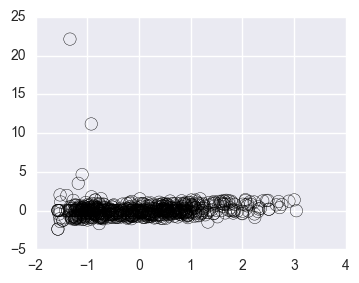

In [197]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
from sklearn import svm

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X_train, y_train)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

### Decsion Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [156]:
dt_to_fit = DecisionTreeClassifier(random_state=42)
max_depths = range(1,20)
class_weights = [None, 'balanced']
min_samples = [2, 5, 10, 20, 50, 100]
dt_params={'max_depth': max_depths, 'class_weight': class_weights, 'min_samples_leaf': min_samples}

In [157]:
%%time
dt_grid = grid_search(dt_to_fit, dt_params)

Best GridSearchCV score: 0.681895067479
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
CPU times: user 2.14 s, sys: 201 ms, total: 2.34 s
Wall time: 8.52 s


In [158]:
%%time
dt_rand = rand_search(dt_to_fit, dt_params)

Best RandomizedSearchCV score: 0.647561496542
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
CPU times: user 161 ms, sys: 53.8 ms, total: 215 ms
Wall time: 551 ms


### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rf = RandomForestClassifier(random_state=42, oob_score=True)
rf.fit(X_train, y_train)

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=16,
            verbose=0, warm_start=False)

In [162]:
rf_to_fit = RandomForestClassifier(random_state=16, oob_score=True)
n_trees = [5, 50, 500]
max_depths = range(1,20)
class_weights = [None, 'balanced']
min_samples = [2, 5, 10, 20, 50, 100]
rf_params={'n_estimators': n_trees, 'max_depth': max_depths, 'class_weight': class_weights, 'min_samples_split': min_samples}

In [166]:
%%time
rf_grid = grid_search(rf_to_fit, rf_params)

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].

Best GridSearchCV score: 0.70116992294
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=16, verbose=0, warm_start=False)
CPU times: user 18.8 s, sys: 3.06 s, total: 21.9 s
Wall time: 26min 34s


In [164]:
%%time
rf_rand = rand_search(rf_to_fit, rf_params)

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some input

Best RandomizedSearchCV score: 0.688187156684
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=16,
            verbose=0, warm_start=False)
CPU times: user 1.7 s, sys: 119 ms, total: 1.82 s
Wall time: 25 s


### Dummy Classifier

In [85]:
dum_class = DummyClassifier()
dum_class.fit(X,y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [88]:
pred_dum = dum_class.predict(X_test)

In [107]:
print("Accuracy: %.3f"% accuracy_score(y_test, dum_class.predict(X_test)))
print(classification_report(y_test, dum_class.predict(X_test)))

Accuracy: 0.505
             precision    recall  f1-score   support

          0       0.49      0.53      0.51       200
          1       0.51      0.48      0.49       208

avg / total       0.50      0.50      0.50       408



In [ ]:
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    print(metric, np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring=metric)))

In [52]:
profile1 = [800,25,.45,.32,.44,.08,1,0,0,0,0,0,0,0,0,0,0]
profile2 = [2000,17,.20,.62,.14,.08,0,0,1,0,0,0,0,0,0,0,0]
profile3 = [500,10,.5,.72,.04,.08,0,0,0,0,0,1,0,0,0,0,0]

In [106]:
record = model_df.ix[1111][1:]
logit.predict(record)

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [76]:
logit.predict(record)

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [53]:
logit.predict_proba([profile1])

array([[  1.00000000e+00,   4.73764130e-73]])

In [56]:
logit.predict([profile1])

array([0])

In [54]:
logit.predict_proba([profile2])

array([[  1.00000000e+000,   5.62995981e-182]])

In [55]:
logit.predict_proba([profile3])

array([[  1.00000000e+00,   1.94952949e-46]])

In [57]:
logit.predict([profile3])

array([0])

In [94]:
model_df.iloc[1]

college_readiness                              0.000000
total_students_calc                         1444.000000
pupil_teacher_ratio                           15.010000
pct_eligible_for_free_lunch                    0.354571
pct_eligible_for_reduced_lunch                 0.086565
pct_white                                      0.427978
pct_black                                      0.348338
pct_hispanic                                   0.081025
urban_centric_locale_12-City: Mid-size         0.000000
urban_centric_locale_13-City: Small            0.000000
urban_centric_locale_21-Suburb: Large          0.000000
urban_centric_locale_22-Suburb: Mid-size       1.000000
urban_centric_locale_23-Suburb: Small          0.000000
urban_centric_locale_31-Town: Fringe           0.000000
urban_centric_locale_32-Town: Distant          0.000000
urban_centric_locale_33-Town: Remote           0.000000
urban_centric_locale_41-Rural: Fringe          0.000000
urban_centric_locale_42-Rural: Distant         0